In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [173]:
df=pd.read_csv("UN_city_pop_projections_long.csv")

In [174]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
0,0,Africa,12,Algeria,20009,Annaba,Urban Agglomeration,36.900000,7.766670,1950,99.741
1,1,Africa,12,Algeria,20011,Batna,City Proper,35.555970,6.174140,1950,13.046
2,2,Africa,12,Algeria,20015,Blida,Urban Agglomeration,36.480781,2.831943,1950,33.970
3,3,Africa,12,Algeria,20006,El Djazaïr (Algiers),Urban Agglomeration,36.752500,3.041970,1950,516.450
4,4,Africa,12,Algeria,20020,El Djelfa,Urban Agglomeration,34.672790,3.263000,1950,10.450
...,...,...,...,...,...,...,...,...,...,...,...
19001,19001,Africa,894,Zambia,23277,Lusaka,Urban Agglomeration,-15.413374,28.277148,2035,5182.669
19002,19002,Africa,894,Zambia,23279,Ndola,City Proper,-12.958670,28.636590,2035,925.726
19003,19003,Africa,716,Zimbabwe,22510,Bulawayo,City Proper,-20.150000,28.583330,2035,874.479
19004,19004,Africa,716,Zimbabwe,22511,Chitungwiza,City Proper,-18.012740,31.075550,2035,552.027


In [175]:

df_new = df[df['Country_or_area'] == 'Morocco']
 
print(df_new)

       Unnamed: 0  Region  Country_Code Country_or_area  City_Code  \
100           100  Africa           504         Morocco      21888   
101           101  Africa           504         Morocco      21891   
102           102  Africa           504         Morocco      21893   
103           103  Africa           504         Morocco      21894   
104           104  Africa           504         Morocco      21896   
...           ...     ...           ...             ...        ...   
18891       18891  Africa           504         Morocco      21898   
18892       18892  Africa           504         Morocco      21899   
18893       18893  Africa           504         Morocco      21900   
18894       18894  Africa           504         Morocco      21903   
18895       18895  Africa           504         Morocco      21905   

                            City      City_Definition   Latitude  Longitude  \
100                       Agadir  Urban Agglomeration  30.424847  -9.593695   
1

In [176]:
df_new.isnull().sum()

Unnamed: 0         0
Region             0
Country_Code       0
Country_or_area    0
City_Code          0
City               0
City_Definition    0
Latitude           0
Longitude          0
year               0
population         0
dtype: int64

In [177]:
df1=df_new.drop(columns =['Unnamed: 0',
'Region',
'Country_Code',
'Country_or_area',
'City_Code',

'City_Definition',

])

In [178]:

df2 = df1[df1['year'] <= 2023]

df2 = df2.reset_index()


In [179]:
df2

,index,City,Latitude,Longitude,year,population
0,100,Agadir,30.424847,-9.593695,1950,10.680
1,101,Dar-el-Beida (Casablanca),33.592780,-7.619160,1950,625.435
2,102,Fès,34.037150,-4.999800,1950,164.588
3,103,Kénitra,34.261010,-6.580200,1950,62.233
4,104,Marrakech,31.631480,-8.008280,1950,208.836
...,...,...,...,...,...,...
809,16239,Oujda,34.680520,-1.907640,2023,593.968
810,16240,Rabat,34.013250,-6.832550,2023,1959.388
811,16241,Safi,32.299390,-9.237180,2023,335.853
812,16242,Tanger,35.784722,-5.812778,2023,1314.178


In [180]:
df2 = df2.drop(columns=['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

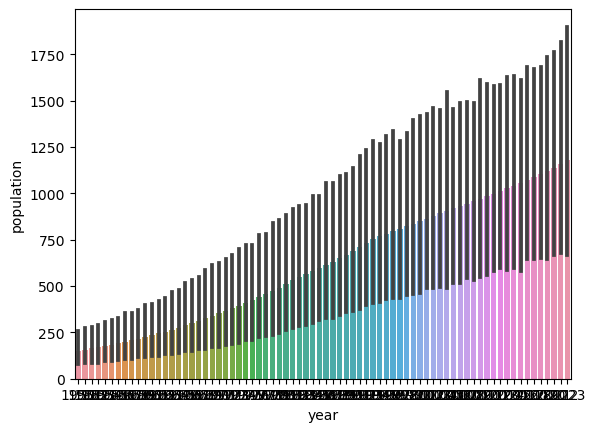

In [181]:
import seaborn as sns
sns.barplot(x="year",y="population",data=df2)

                Latitude     Longitude          year  population
Latitude    1.000000e+00  7.355679e-01 -8.464016e-15   -0.013519
Longitude   7.355679e-01  1.000000e+00  9.298075e-16   -0.139195
year       -8.464016e-15  9.298075e-16  1.000000e+00    0.436851
population -1.351877e-02 -1.391951e-01  4.368508e-01    1.000000


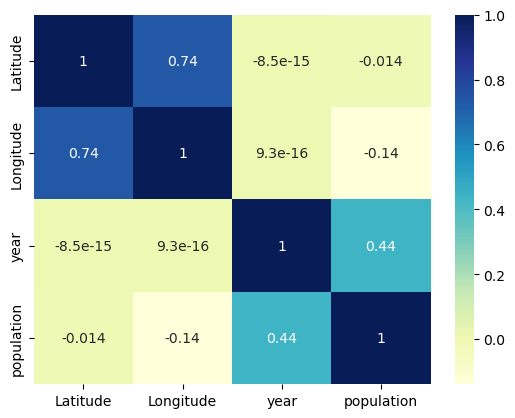

In [184]:
import seaborn as sb

# import modules
import matplotlib.pyplot as mp
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [185]:
df3 = pd.get_dummies(df2, columns = ['City'])
df3


,Latitude,Longitude,year,population,City_Agadir,City_Dar-el-Beida (Casablanca),City_Fès,City_Kénitra,City_Marrakech,City_Meknès,City_Oujda,City_Rabat,City_Safi,City_Tanger,City_Tétouan
0,30.424847,-9.593695,1950,10.680,1,0,0,0,0,0,0,0,0,0,0
1,33.592780,-7.619160,1950,625.435,0,1,0,0,0,0,0,0,0,0,0
2,34.037150,-4.999800,1950,164.588,0,0,1,0,0,0,0,0,0,0,0
3,34.261010,-6.580200,1950,62.233,0,0,0,1,0,0,0,0,0,0,0
4,31.631480,-8.008280,1950,208.836,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,34.680520,-1.907640,2023,593.968,0,0,0,0,0,0,1,0,0,0,0
810,34.013250,-6.832550,2023,1959.388,0,0,0,0,0,0,0,1,0,0,0
811,32.299390,-9.237180,2023,335.853,0,0,0,0,0,0,0,0,1,0,0
812,35.784722,-5.812778,2023,1314.178,0,0,0,0,0,0,0,0,0,1,0


In [186]:
X_train = df3[['City_Agadir',
'City_Dar-el-Beida (Casablanca)',
'City_Fès',
'City_Kénitra',
'City_Marrakech',
'City_Meknès',
'City_Oujda',
'City_Rabat',
'City_Safi',
'City_Tanger',
'City_Tétouan',
'Latitude',
'Longitude',
'year']]
y_train = df3['population']

Linear regression

In [187]:
model = LinearRegression()



In [188]:
model.fit(X_train,y_train)

LinearRegression()

In [189]:
predict_train = model.predict(X_train)
predict_train

array([-1.60339606e+02,  1.80982934e+03,  1.17213448e+02, -2.96135863e+02,
        2.03107994e+01, -1.93049579e+02, -2.44591768e+02,  4.88340232e+02,
       -3.39664282e+02, -6.74770250e+01, -3.09402214e+02, -1.45463325e+02,
        1.82470562e+03,  1.32089729e+02, -2.81259582e+02,  3.51870803e+01,
       -1.78173298e+02, -2.29715487e+02,  5.03216513e+02, -3.24788001e+02,
       -5.26007440e+01, -2.94525933e+02, -1.30587044e+02,  1.83958190e+03,
        1.46966010e+02, -2.66383301e+02,  5.00633613e+01, -1.63297017e+02,
       -2.14839206e+02,  5.18092794e+02, -3.09911720e+02, -3.77244631e+01,
       -2.79649652e+02, -1.15710763e+02,  1.85445818e+03,  1.61842291e+02,
       -2.51507020e+02,  6.49396422e+01, -1.48420736e+02, -1.99962925e+02,
        5.32969075e+02, -2.95035439e+02, -2.28481821e+01, -2.64773371e+02,
       -1.00834482e+02,  1.86933446e+03,  1.76718572e+02, -2.36630739e+02,
        7.98159232e+01, -1.33544455e+02, -1.85086644e+02,  5.47845356e+02,
       -2.80159158e+02, -

In [190]:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predict_train)



74261.92190863131

In [191]:
from sklearn.metrics import r2_score
er1=r2_score(y_train,predict_train)
er1

0.8596407852399629

In [192]:

# importing libraries
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)
  
model_ridge = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
model_ridge.fit(X_train, y_train)
  
# predicting the y_test
y_pred_ridge = model.predict(X_train)
  

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [193]:

  
# finding score for our model
score = model.score(X_train, y_train)
print("\n\nModel score : ", score)



Model score :  0.8596407852399629


In [194]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred_ridge)


74261.92190863131

In [195]:
df4= df1[df1['year'] >= 2023]

In [196]:
df4= df4.reset_index()
df4 = df4.drop(columns=['index'])
df4

,City,Latitude,Longitude,year,population
0,Agadir,30.424847,-9.593695,2023,979.248
1,Dar-el-Beida (Casablanca),33.592780,-7.619160,2023,3892.837
2,Fès,34.037150,-4.999800,2023,1290.039
3,Kénitra,34.261010,-6.580200,2023,507.848
4,Marrakech,31.631480,-8.008280,2023,1049.690
...,...,...,...,...,...
138,Oujda,34.680520,-1.907640,2035,723.917
139,Rabat,34.013250,-6.832550,2035,2356.117
140,Safi,32.299390,-9.237180,2035,403.236
141,Tanger,35.784722,-5.812778,2035,1631.490


In [197]:
df5= pd.get_dummies(df4, columns = ['City'])
df5


,Latitude,Longitude,year,population,City_Agadir,City_Dar-el-Beida (Casablanca),City_Fès,City_Kénitra,City_Marrakech,City_Meknès,City_Oujda,City_Rabat,City_Safi,City_Tanger,City_Tétouan
0,30.424847,-9.593695,2023,979.248,1,0,0,0,0,0,0,0,0,0,0
1,33.592780,-7.619160,2023,3892.837,0,1,0,0,0,0,0,0,0,0,0
2,34.037150,-4.999800,2023,1290.039,0,0,1,0,0,0,0,0,0,0,0
3,34.261010,-6.580200,2023,507.848,0,0,0,1,0,0,0,0,0,0,0
4,31.631480,-8.008280,2023,1049.690,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,34.680520,-1.907640,2035,723.917,0,0,0,0,0,0,1,0,0,0,0
139,34.013250,-6.832550,2035,2356.117,0,0,0,0,0,0,0,1,0,0,0
140,32.299390,-9.237180,2035,403.236,0,0,0,0,0,0,0,0,1,0,0
141,35.784722,-5.812778,2035,1631.490,0,0,0,0,0,0,0,0,0,1,0


In [198]:
X_test= df5[['City_Agadir',
'City_Dar-el-Beida (Casablanca)',
'City_Fès',
'City_Kénitra',
'City_Marrakech',
'City_Meknès',
'City_Oujda',
'City_Rabat',
'City_Safi',
'City_Tanger',
'City_Tétouan',
'Latitude',
'Longitude',
'year']]
y_test = df5['population']

In [199]:
y_pop=df5[['City_Agadir',
'City_Dar-el-Beida (Casablanca)',
'City_Fès',
'City_Kénitra',
'City_Marrakech',
'City_Meknès',
'City_Oujda',
'City_Rabat',
'City_Safi',
'City_Tanger',
'City_Tétouan',
'population',
'year']]
y_pop

,City_Agadir,City_Dar-el-Beida (Casablanca),City_Fès,City_Kénitra,City_Marrakech,City_Meknès,City_Oujda,City_Rabat,City_Safi,City_Tanger,City_Tétouan,population,year
0,1,0,0,0,0,0,0,0,0,0,0,979.248,2023
1,0,1,0,0,0,0,0,0,0,0,0,3892.837,2023
2,0,0,1,0,0,0,0,0,0,0,0,1290.039,2023
3,0,0,0,1,0,0,0,0,0,0,0,507.848,2023
4,0,0,0,0,1,0,0,0,0,0,0,1049.690,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,0,0,0,0,0,1,0,0,0,0,723.917,2035
139,0,0,0,0,0,0,0,1,0,0,0,2356.117,2035
140,0,0,0,0,0,0,0,0,1,0,0,403.236,2035
141,0,0,0,0,0,0,0,0,0,1,0,1631.490,2035


In [200]:
Y_test_linear=model.predict(X_test)

In [201]:
Y_test_linear

array([ 925.62890334, 2895.79784929, 1203.1819574 ,  789.83264658,
       1106.27930875,  892.91893037,  841.37674118, 1574.30874118,
        746.30422767, 1018.49148442,  776.56629523,  940.50518429,
       2910.67413024, 1218.05823835,  804.70892754, 1121.1555897 ,
        907.79521132,  856.25302213, 1589.18502213,  761.18050862,
       1033.36776537,  791.44257618,  955.38146524, 2925.55041119,
       1232.9345193 ,  819.58520849, 1136.03187065,  922.67149227,
        871.12930308, 1604.06130308,  776.05678957, 1048.24404632,
        806.31885713,  970.25774619, 2940.42669214, 1247.81080025,
        834.46148944, 1150.9081516 ,  937.54777322,  886.00558403,
       1618.93758403,  790.93307052, 1063.12032727,  821.19513808,
        985.13402714, 2955.30297309, 1262.6870812 ,  849.33777039,
       1165.78443255,  952.42405417,  900.88186498, 1633.81386498,
        805.80935147, 1077.99660822,  836.07141904, 1000.01030809,
       2970.17925404, 1277.56336215,  864.21405134, 1180.66071

In [202]:
predicted = pd.DataFrame(Y_test_linear,columns=['predicted'])

In [203]:
df_linear_regression = pd.merge(y_pop,predicted,how = 'left',left_index = True, right_index = True)

In [204]:
df_linear_regression

,City_Agadir,City_Dar-el-Beida (Casablanca),City_Fès,City_Kénitra,City_Marrakech,City_Meknès,City_Oujda,City_Rabat,City_Safi,City_Tanger,City_Tétouan,population,year,predicted
0,1,0,0,0,0,0,0,0,0,0,0,979.248,2023,925.628903
1,0,1,0,0,0,0,0,0,0,0,0,3892.837,2023,2895.797849
2,0,0,1,0,0,0,0,0,0,0,0,1290.039,2023,1203.181957
3,0,0,0,1,0,0,0,0,0,0,0,507.848,2023,789.832647
4,0,0,0,0,1,0,0,0,0,0,0,1049.690,2023,1106.279309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,0,0,0,0,0,1,0,0,0,0,723.917,2035,1019.892113
139,0,0,0,0,0,0,0,1,0,0,0,2356.117,2035,1752.824113
140,0,0,0,0,0,0,0,0,1,0,0,403.236,2035,924.819599
141,0,0,0,0,0,0,0,0,0,1,0,1631.490,2035,1197.006856


In [205]:
City_Agadir=df_linear_regression[df_linear_regression['City_Agadir'] == 1]

City_Agadir= City_Agadir.reset_index()
City_Agadir=City_Agadir.drop(columns =['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

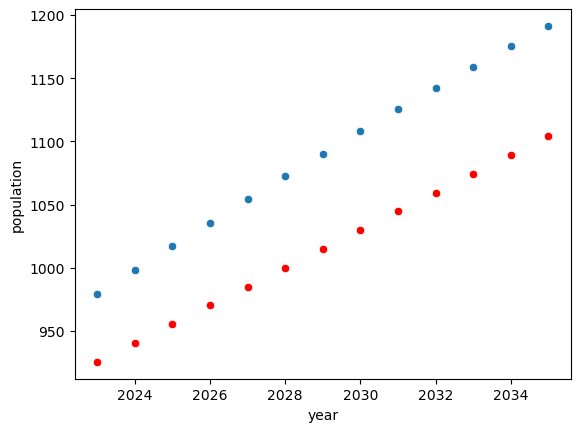

In [206]:
sns.scatterplot(data=City_Agadir,x="year",y="population")
sns.scatterplot(data=City_Agadir,x="year",y="predicted",color='red')

GradientBoostingRegressor

In [248]:
gbr = GradientBoostingRegressor(learning_rate= 0.05, loss= 'huber', max_depth= 4, n_estimators= 300, subsample= 0.8)

In [249]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          n_estimators=300, subsample=0.8)

In [250]:
y_pred_gbr = gbr.predict(X_train)

In [251]:
mean_squared_error(y_train,y_pred_gbr)

56.72057015577137

In [252]:
gbr.fit(X_test,y_test)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          n_estimators=300, subsample=0.8)

In [253]:
y_pred_g = gbr.predict(X_test)
predicted = pd.DataFrame(y_pred_g,columns=['predicted'])

In [254]:
mean_squared_error(y_test,y_pred_g)

1.6913720473469407

In [255]:
r2_score(y_test,y_pred_g)

0.9999985413773044

In [256]:
df_gnb = pd.merge(y_pop,predicted,how = 'left',left_index = True, right_index = True)

In [257]:
df_gnb

,City_Agadir,City_Dar-el-Beida (Casablanca),City_Fès,City_Kénitra,City_Marrakech,City_Meknès,City_Oujda,City_Rabat,City_Safi,City_Tanger,City_Tétouan,population,year,predicted
0,1,0,0,0,0,0,0,0,0,0,0,979.248,2023,980.420218
1,0,1,0,0,0,0,0,0,0,0,0,3892.837,2023,3891.862631
2,0,0,1,0,0,0,0,0,0,0,0,1290.039,2023,1290.253496
3,0,0,0,1,0,0,0,0,0,0,0,507.848,2023,507.625202
4,0,0,0,0,1,0,0,0,0,0,0,1049.690,2023,1050.523449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,0,0,0,0,0,1,0,0,0,0,723.917,2035,725.034739
139,0,0,0,0,0,0,0,1,0,0,0,2356.117,2035,2355.565380
140,0,0,0,0,0,0,0,0,1,0,0,403.236,2035,404.652596
141,0,0,0,0,0,0,0,0,0,1,0,1631.490,2035,1627.713823


In [258]:
City_Agadir=df_gnb[df_gnb['City_Agadir'] == 1]

City_Agadir= City_Agadir.reset_index()
City_Agadir=City_Agadir.drop(columns =['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

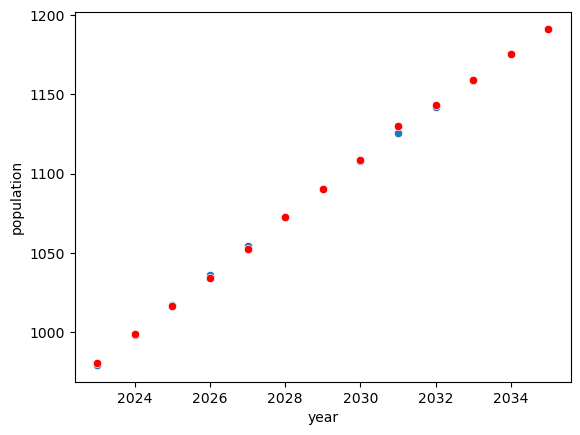

In [259]:
sns.scatterplot(data=City_Agadir,x="year",y="population")
sns.scatterplot(data=City_Agadir,x="year",y="predicted",color='red')

In [260]:
City_Tanger=df_gnb[df_gnb['City_Tanger'] == 1]

City_Tanger= City_Tanger.reset_index()
City_Tanger=City_Tanger.drop(columns =['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

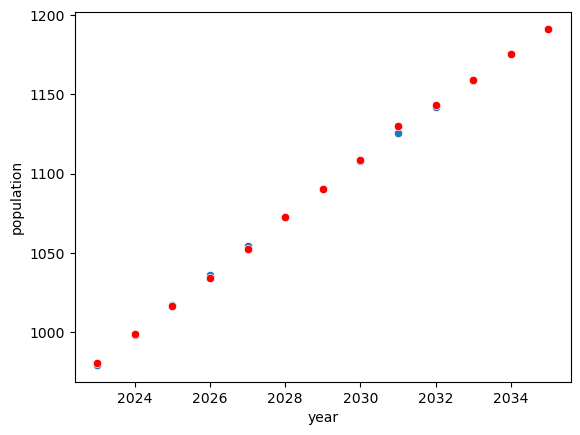

In [261]:
sns.scatterplot(data=City_Agadir,x="year",y="population")
sns.scatterplot(data=City_Agadir,x="year",y="predicted",color='red')

gradient boosting regression is giving good results.
